In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

(-1, 1)

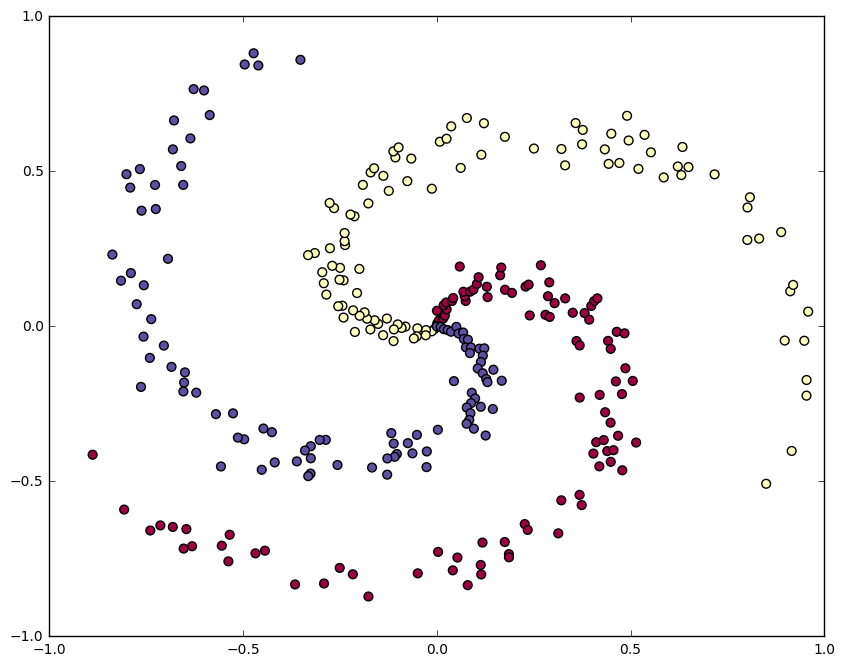

In [8]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

In [10]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print "iteration %d: loss %f" % (i, loss)
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.100624
iteration 10: loss 0.918448
iteration 20: loss 0.851978
iteration 30: loss 0.822560
iteration 40: loss 0.807703
iteration 50: loss 0.799514
iteration 60: loss 0.794720
iteration 70: loss 0.791788
iteration 80: loss 0.789936
iteration 90: loss 0.788736
iteration 100: loss 0.787944
iteration 110: loss 0.787413
iteration 120: loss 0.787052
iteration 130: loss 0.786805
iteration 140: loss 0.786634
iteration 150: loss 0.786515
iteration 160: loss 0.786432
iteration 170: loss 0.786373
iteration 180: loss 0.786332
iteration 190: loss 0.786302


In [11]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.49


(-1.8712034092398278, 1.8687965907601756)

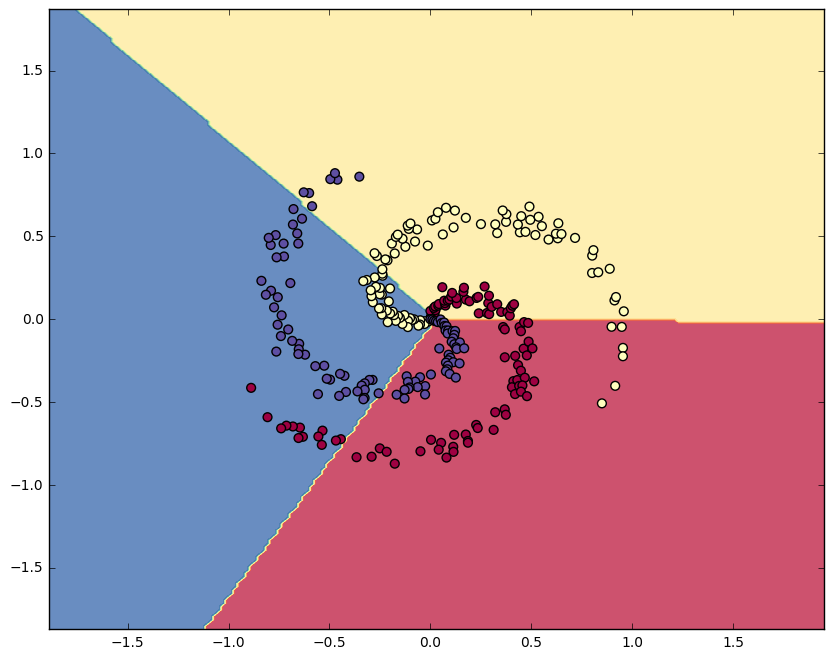

In [12]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')

In [18]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in xrange(10000):

  """
  The loss and gradient computation for the 2-layer NN + softmax will be performed 
  in 2 passes:
     - In the forward pass, the loss calculation is decomposed into
       7 stages.
       At the end of the forward pass, loss is calculated
     - In the backward pass, we use chain rule to calculate the gradients
       from Stage 7 back to Stage 1
       At the end of the backward pass, the gradient dW is calculated
  """

  # NN+Softmax Forward Pass - 5 Stages in Total  
    
  # evaluate class scores, [N x K]\

  # Stage 1 - dot(X, W) + b --> RelU --> hidden_layer                  [1]   
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  
  # Stage 2 - dot(hidden_layer, W2) + b2 --> scores                    [2]   
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities

  # Stage 3 - exp(scores) --> exp_scores                               [3] 
  exp_scores = np.exp(scores)

  # Stage 4 - exp_scores/sum(exp_scores) --> probs                     [4]   
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization

  # Stage 5 - sum(corect_scores)/num_examples --> data_loss            [5]   
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
    
  # Regularization Forward Pass - 0.5*reg*(sum(W^2)+sum(W2^2)) --> reg_loss  
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)

  loss = data_loss + reg_loss

  if i % 1000 == 0:
    print "iteration %d: loss %f" % (i, loss)
  
  # NN+Softmax Backward Pass - 5 Stages in Reverse  

  # compute the gradient on scores

  # Stage 3-5 - Backprop softmax operation                            [3-5]
  # The local gradient for the softmax operation can be optimized into a
  # very elegant equation (cs231n.github.io/neural-networks-case-study/):
  # (∂L_i)/(∂f_k)= p_k-1(y_i=k)
  # where:
  #  L_i is the data_loss for example i  
  #  f_k is the score of the correct class
  #  y_i is the true label of example i
  #  p_k is e^(f_k)/( ∑_j (e^(f_j) ) ) where f_j is the score for class j
  # 
  # In practice, this mean that for each example i, the local gradients for
  # for the scores of the classes are:
  #   p_j if j != k (correct class)
  #   p_k - 1 if j = k (correct class)
  #
  # The code below is an elegent way of implementing the simple calculations
  # above.
  #
  # Note also that the dscore is then divided by num_example to take into
  # account that the final data_loss = ∑_i (L_i)/num_example

  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
    
  # first backprop into parameters W2 and b2

  # Stage 2 - backprop dot(hidden_layer, W2) + b2 --> scores            [2]   
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
    
  # next backprop into hidden layer

  # Stage 1 - backprop dot(X, W) + b --> RelU --> hidden_layer          [1]   
  dhidden = np.dot(dscores, W2.T)
  
  # Backprop the ReLU non-linearity
  # The local gradient for the ReLU is effectively a switch:
  #     Since r=max(0,x), we have that dr/dx=1(x>0).
  # (http://cs231n.github.io/neural-networks-case-study/)
  # The ReLU unit lets the gradient pass through unchanged if its input 
  # was greater than 0, but kills it if its input was less than zero 
  # during the forward pass.

  dhidden[hidden_layer <= 0] = 0

  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # Regularization Backward Pass - Backrprop 0.5*reg*(sum(W^2)+sum(W2^2)) --> reg_loss  
  # add regularization gradient contribution 
  dW2 += reg * W2   # local gradient - 0.5*reg*2*W2 = reg*W2
  dW += reg * W     # local gradient - 0.5*reg*2*W = reg*W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098689
iteration 1000: loss 0.302637
iteration 2000: loss 0.261922
iteration 3000: loss 0.253519
iteration 4000: loss 0.247749
iteration 5000: loss 0.245843
iteration 6000: loss 0.245301
iteration 7000: loss 0.245076
iteration 8000: loss 0.244965
iteration 9000: loss 0.244901


In [19]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.98


(-1.8712034092398278, 1.8687965907601756)

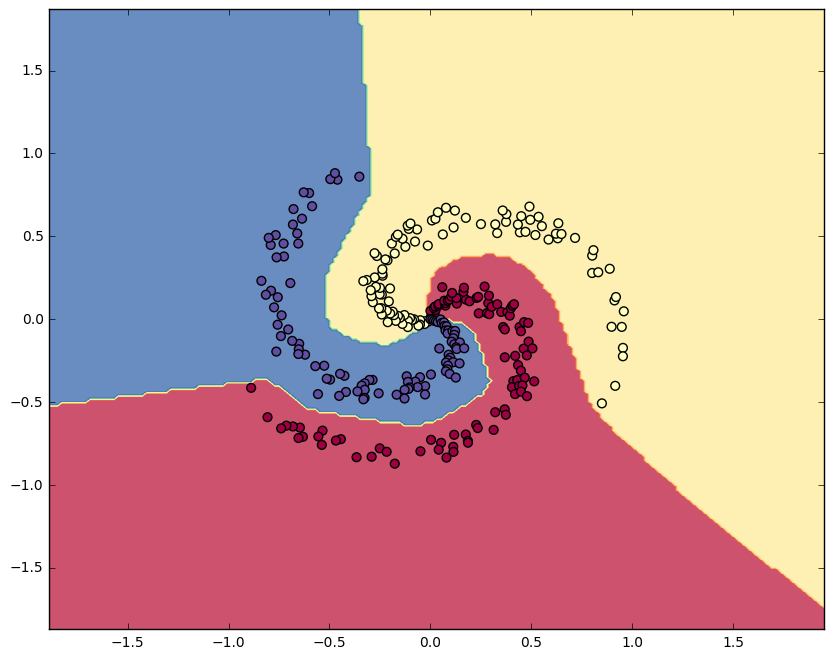

In [20]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')